In [ ]:
from scipy.stats import norm, truncnorm, uniform
from Load_LensPop_LSST_db import db_LensPop_LSST
from plot_image_collage import plot_collage
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
import glob
test_db = pd.read_csv('/mnt/zfsusers/hollowayp/paltas/datasets/LensPop_databases/LensPop_LSST_Paltas_Catalogue_0.csv')

In [ ]:
'''
FP_Catalogue_0: Source position uniform in x,y between -2,2. tE = 0.
FP_Catalogue_1: As above, with large source ellipticity (to mimic arcs): truncnorm(a=-4,b=1,loc=0.8,scale=0.2)

'''

In [17]:
pd.set_option('display.max_columns', 500)


array([-1, -1, -1,  1, -1,  1, -1,  1, -1, -1])

In [19]:
N_db = 1000
false_pos_db = pd.DataFrame()
for property_i in test_db.columns:
      mean_i,scale_i = np.round(test_db.describe().loc[['mean','std']][property_i],1)
      if property_i in ['zL','Re_lens','Re_source']:
            false_pos_db[property_i] = truncnorm(-mean_i/scale_i,np.inf,loc=mean_i,scale=scale_i).rvs(N_db)  
      elif property_i in ['xs','ys']:
            false_pos_db[property_i] = uniform(-2,2).rvs(N_db) #Uniform in x and y
      elif property_i =='zS':
            false_pos_db['zS'] = false_pos_db['zL']  #Put source at same redshift as lens    
      elif property_i =='tE':
            false_pos_db['tE'] = 0 #Ensure no lensing is done
      elif property_i == 'e1_source':
            false_pos_db[property_i] = 0.8#truncnorm(a=-10,b=10,loc=0,scale=0.1).rvs(N_db)
      elif property_i =='e2_source':
            false_pos_db[property_i] = np.sqrt(1-false_pos_db['e1_source']**2)*(2*np.random.randint(0,2,size=N_db)-1)
      else:
            false_pos_db[property_i] = norm(loc=mean_i,scale=scale_i).rvs(N_db)

false_pos_db['xs']=0.5
false_pos_db['ys']=0.5
false_pos_db['zL']=0.5
false_pos_db['zS']=0.5
false_pos_db['source_Ns']=4
false_pos_db['Re_source']=1
false_pos_db['i_source'] =16# 20

#N_saved = len(glob.glob('/mnt/zfsusers/hollowayp/paltas/datasets/LensPop_databases/LensPop_LSST_Paltas_False_Positive_Catalogue*'))
file_to_save = f'/mnt/zfsusers/hollowayp/paltas/datasets/LensPop_databases/LensPop_LSST_Paltas_False_Positive_Catalogue_{N_saved}.csv'
print(f'Saving as: {file_to_save}')
false_pos_db.to_csv(file_to_save)
false_pos_db.describe()

Saving as: /mnt/zfsusers/hollowayp/paltas/datasets/LensPop_databases/LensPop_LSST_Paltas_False_Positive_Catalogue_2.csv


,Unnamed: 0,zL,zS,tE,sig_v,q_lens_flat,Re_lens,g_lens,r_lens,i_lens,xs,ys,q_source_flat,PA_source,Re_source,g_source,r_source,i_source,mu_s,g_see,g_see_sub,r_see,r_see_sub,i_see,i_see_sub,SNR,e1_source,e2_source,PA_lens,e1_lens,e2_lens,defl_mass_x,defl_mass_y,defl_light_x,defl_light_y,defl_gamma,defl_e1_mass,defl_e2_mass,defl_e1_light,defl_e2_light,defl_gamma1,defl_gamma2,defl_Ns,source_Ns
count,1000.000000,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0
mean,4399.818901,0.5,0.5,0.0,275.692276,0.695853,0.919527,21.321962,19.225286,18.297192,0.5,0.5,0.596899,89.377177,1.0,25.909911,25.723664,16.0,8.321405,1.695874,37.132007,1.706449,47.305880,1.710061,34.961213,19.935027,8.000000e-01,0.022800,1.575602,0.001684,-0.001680,0.0,0.0,0.0,0.0,2.0,0.000811,0.004595,0.000072,0.000820,0.0,0.0,4.0,4.0
std,2594.736250,0.0,0.0,0.0,36.107914,0.096189,0.453674,2.343685,2.106149,1.760923,0.0,0.0,0.195278,52.686285,0.0,1.181645,1.005417,0.0,8.053087,0.212786,51.786506,0.311061,60.022624,0.201554,53.513061,33.854544,1.110779e-16,0.599867,0.910968,0.106150,0.100191,0.0,0.0,0.0,0.0,0.0,0.102562,0.097189,0.098469,0.098786,0.0,0.0,0.0,0.0
min,-3294.658322,0.5,0.5,0.0,157.361399,0.375441,0.005327,12.907112,12.612896,12.605121,0.5,0.5,-0.066466,-58.483947,1.0,21.648956,22.753631,16.0,-16.936289,0.896476,-131.695000,0.449885,-161.749714,1.080181,-133.090792,-80.931630,8.000000e-01,-0.600000,-1.330167,-0.408348,-0.312623,0.0,0.0,0.0,0.0,2.0,-0.293615,-0.278507,-0.356175,-0.337437,0.0,0.0,4.0,4.0
25%,2701.915875,0.5,0.5,0.0,251.197096,0.635946,0.589234,19.804785,17.840899,17.096007,0.5,0.5,0.466014,53.987265,1.0,25.083256,25.059652,16.0,3.005024,1.553918,2.399444,1.487899,7.153675,1.568823,-2.967310,-2.449395,8.000000e-01,-0.600000,0.966681,-0.070737,-0.071098,0.0,0.0,0.0,0.0,2.0,-0.067380,-0.062592,-0.062445,-0.064092,0.0,0.0,4.0,4.0
50%,4387.424989,0.5,0.5,0.0,276.143994,0.696054,0.892174,21.329619,19.277964,18.332371,0.5,0.5,0.600305,88.417726,1.0,25.916772,25.732325,16.0,8.421745,1.695199,37.640480,1.706837,47.560617,1.715091,33.835902,21.784425,8.000000e-01,0.600000,1.569644,0.000784,-0.002432,0.0,0.0,0.0,0.0,2.0,-0.002719,0.006760,0.001810,-0.003347,0.0,0.0,4.0,4.0
75%,6224.727217,0.5,0.5,0.0,299.146297,0.760740,1.221856,22.974709,20.498364,19.542911,0.5,0.5,0.727816,125.943091,1.0,26.741742,26.424209,16.0,13.746346,1.843191,72.222216,1.915158,84.647493,1.848170,71.738287,42.536461,8.000000e-01,0.600000,2.154433,0.074910,0.066529,0.0,0.0,0.0,0.0,2.0,0.070748,0.072274,0.064636,0.063913,0.0,0.0,4.0,4.0
max,12121.142243,0.5,0.5,0.0,394.334593,1.007745,2.537847,29.837038,25.918508,25.094899,0.5,0.5,1.148398,238.904907,1.0,29.475762,28.793514,16.0,35.713012,2.276941,226.566878,2.675918,251.542004,2.360077,204.790262,123.560367,8.000000e-01,0.600000,4.363692,0.356063,0.299844,0.0,0.0,0.0,0.0,2.0,0.292920,0.290203,0.301868,0.316369,0.0,0.0,4.0,4.0


Plotting from h5 files


100%|██████████| 20/20 [00:00<00:00, 296417.24it/s]

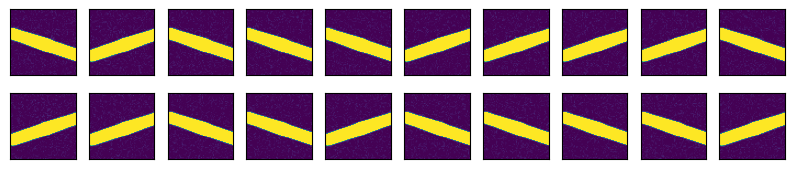

In [20]:
plot_collage('./False_Positives_Cutouts/2/',2,10,0,2)

In [21]:
'''
Conclusions:
There is still some lensing taking place even when I set tE to 0, as the source brightness depends on the position.
Therefore I should just add an additional light-source directly into the paltas code, rather than treating it as some sort
of lensed source with zL=zS.
'''

'\nConclusions:\nThere is still some lensing taking place even when I set tE to 0, as the source brightness depends on the position.\nTherefore I should just add an additional light-source directly into the paltas code, rather than treating it as some sort\nof lensed source with zL=zS.\n'